In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import os, sys

project_root = '/user_data/mmhender/featsynth/'
sys.path.append(project_root)
from code_utils import stats_utils, plot_utils
from code_analysis import analyze_expt1

In [2]:
from code_imageanalysis import get_categ_discrim
# Method 1
basic_sep, basic_sep_each_supcat, super_sep_each_supcat = get_categ_discrim.compute_cosine_similarity()

/user_data/mmhender/featsynth/features/simclr/images_expt1_withscrambled_simclr_block2_pca.npy
/user_data/mmhender/featsynth/features/simclr/images_expt1_withscrambled_simclr_block6_pca.npy
/user_data/mmhender/featsynth/features/simclr/images_expt1_withscrambled_simclr_block12_pca.npy
/user_data/mmhender/featsynth/features/simclr/images_expt1_withscrambled_simclr_block15_pca.npy


In [10]:
super_names, super_cbinds, basic_names, basic_inds, \
        super_names_long, super_inds_long, n_basic, n_super, n_basic_each_super = \
            analyze_expt1.get_categ_info()

trial_data_all, subjects, subject_cb, cue_level_names, image_type_names = analyze_expt1.load_data()
 
n_subjects = len(subjects)
n_cue_levels = len(cue_level_names)
n_image_types = len(image_type_names)


In [11]:
# Method 2
save_dir = os.path.join(project_root, 'features', 'simclr', 'categ_discrim')
fn2load = os.path.join(save_dir, 'categ_discrim_expt1.npy')
d = np.load(fn2load, allow_pickle=True).item()
d.keys()

dict_keys(['acc_super_overall', 'dprime_super_overall', 'acc_basic_overall', 'dprime_basic_overall', 'acc_each_supcat', 'acc_each_bascat', 'dprime_each_supcat', 'dprime_each_bascat'])

#### Params for plotting

In [8]:
cue_level_colors = np.array([[93,192,219], [44,92,168]])/255
point_types = ['o','x']
markersize = 4;
xjitters = [-0.02, 0.02]

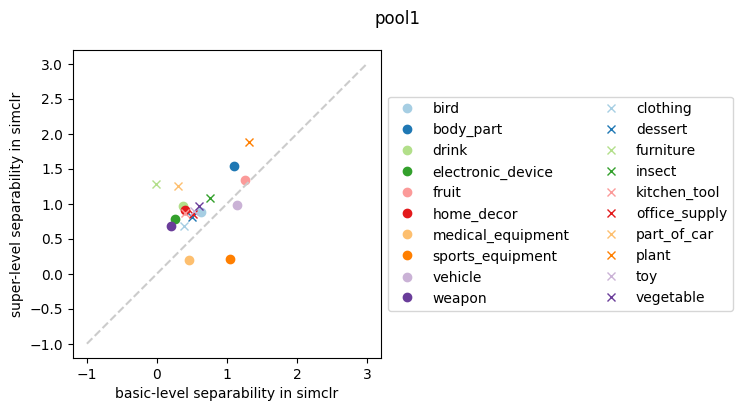

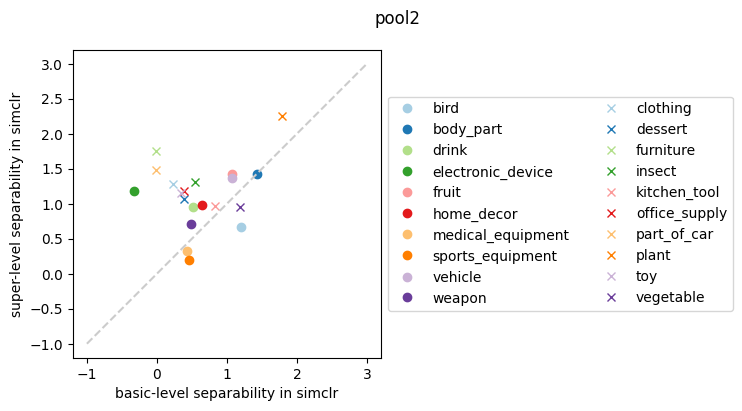

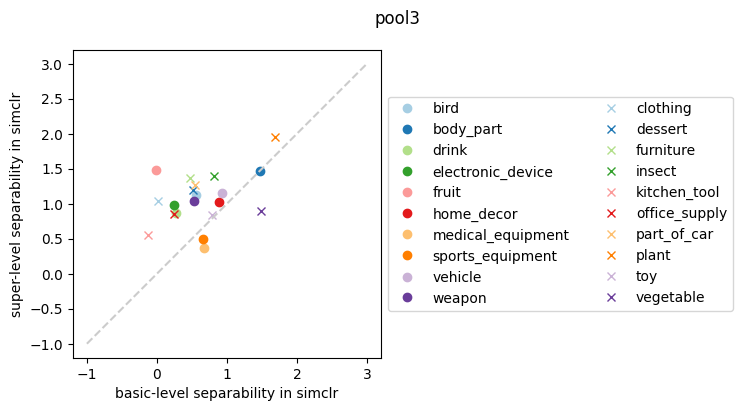

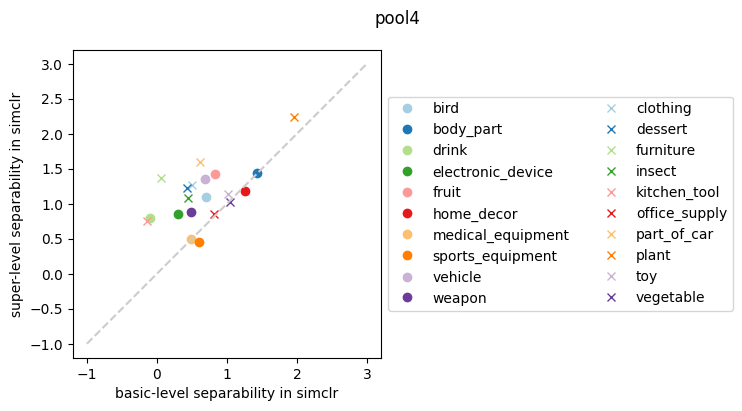

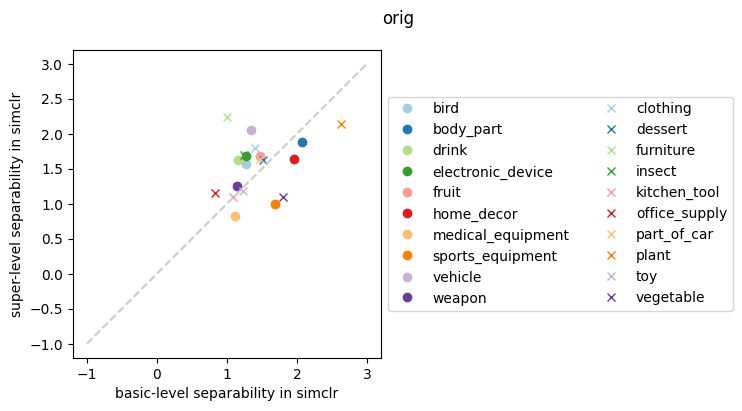

In [12]:
for ii in range(5):
# for ii in [4]:
    
    plt.figure(figsize=(12,4))

    lims = [-1, 3.0]

    ax = plt.subplot(1,1,1)

    allh = []
    # pi=0
    for cbi in [0,1]:

        # pi+=1
        
        supnames = super_names[super_cbinds==cbi]

        # overall performance at basic-level classification, within supcat
        dist1 = d['dprime_basic_overall'][ii, super_cbinds==cbi]

        # performance at super-ordinate classification, for each supcat
        dist2 = d['dprime_each_supcat'][super_cbinds==cbi, ii]
        
        assert(np.all(dist1<lims[1]) & np.all(dist1>lims[0]))
        assert(np.all(dist2<lims[1]) & np.all(dist2>lims[0]))

        basic_colors = cm.Paired(np.linspace(0, 1, 12))[0:10,:]
        
        for bi in range(len(dist1)):

            h, = plt.plot(dist1[bi], dist2[bi], point_types[cbi], color=basic_colors[bi,:], alpha=1)

            allh+=[h]

    # plt.title('image set %d'%(cbi+1))

    plt.xlabel('basic-level separability in simclr')
    plt.ylabel('super-level separability in simclr')

    plt.xlim(lims)
    plt.ylim(lims)

    plt.plot(lims,lims, color=[0.8, 0.8, 0.8], linestyle='--')

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])

    plt.axis('square')
    # Put a legend to the right of the current axis
    ax.legend(allh, super_names, loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)


    plt.suptitle(image_type_names[ii])

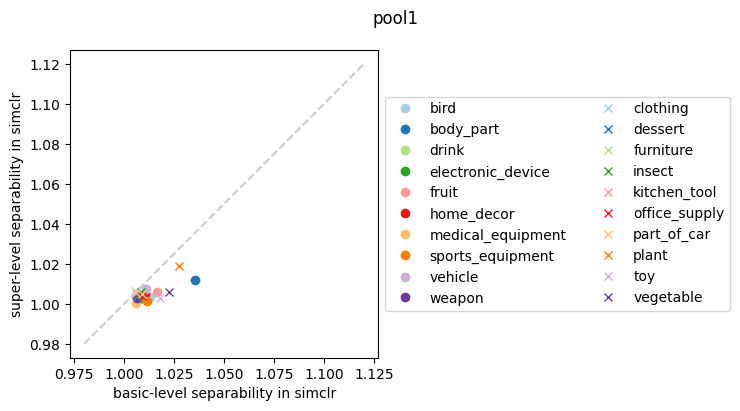

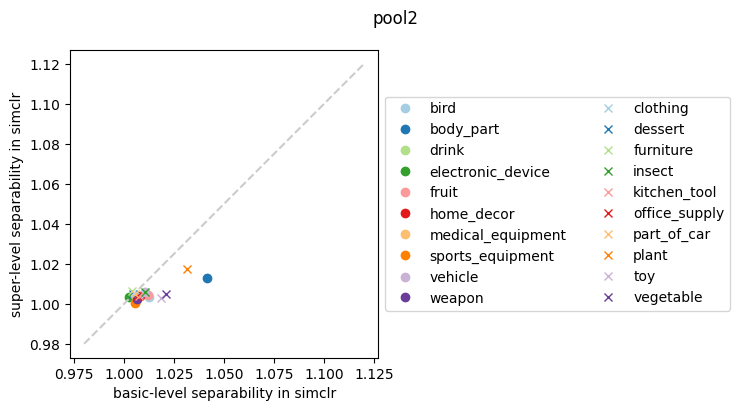

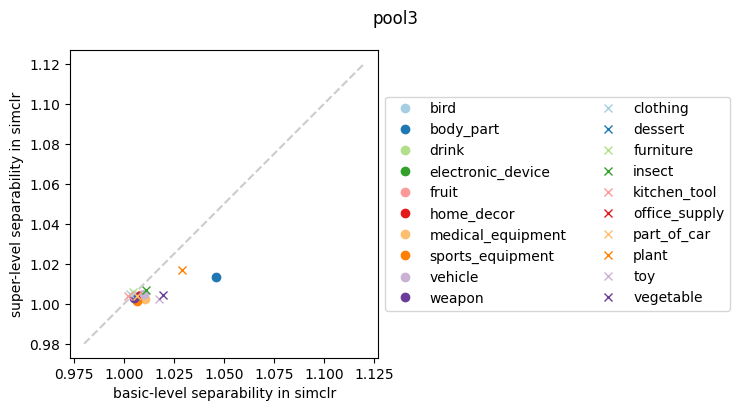

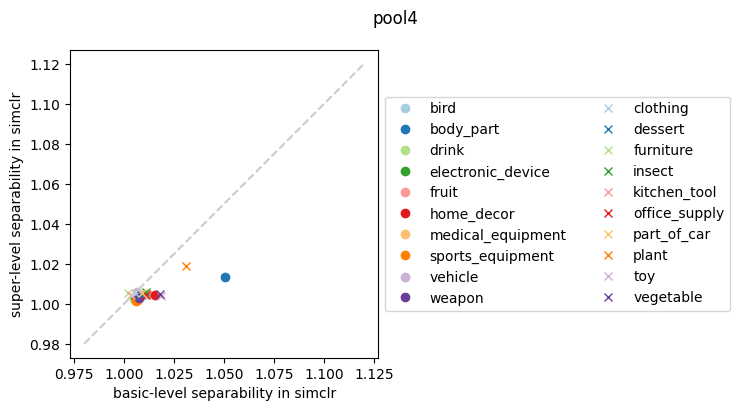

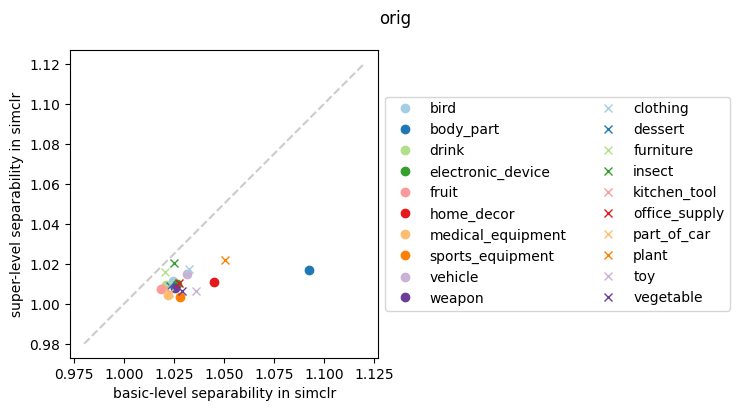

In [13]:
for ii in range(5):

    plt.figure(figsize=(12,4))

    lims = [0.98, 1.12]

    ax = plt.subplot(1,1,1)

    allh = []
    # pi=0
    for cbi in [0,1]:

        # pi+=1

        supnames = super_names[super_cbinds==cbi]

        dist1 = basic_sep_each_supcat[super_cbinds==cbi,ii]
        dist2 = super_sep_each_supcat[super_cbinds==cbi,ii]

        assert(np.all(dist1<lims[1]) & np.all(dist1>lims[0]))
        assert(np.all(dist2<lims[1]) & np.all(dist2>lims[0]))

        basic_colors = cm.Paired(np.linspace(0, 1, 12))[0:10,:]

        for bi in range(len(dist1)):

            h, = plt.plot(dist1[bi], dist2[bi], point_types[cbi], color=basic_colors[bi,:], alpha=1)

            allh+=[h]

    # plt.title('image set %d'%(cbi+1))

    plt.xlabel('basic-level separability in simclr')
    plt.ylabel('super-level separability in simclr')

    plt.xlim(lims)
    plt.ylim(lims)

    plt.plot(lims,lims, color=[0.8, 0.8, 0.8], linestyle='--')

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])

    plt.axis('square')
    # Put a legend to the right of the current axis
    ax.legend(allh, super_names, loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)


    plt.suptitle(image_type_names[ii])

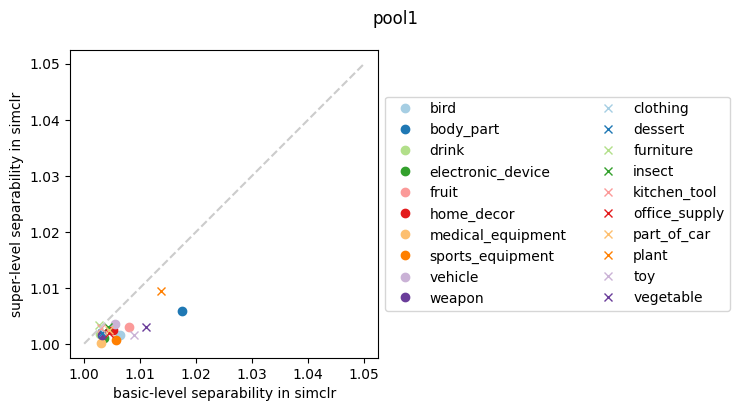

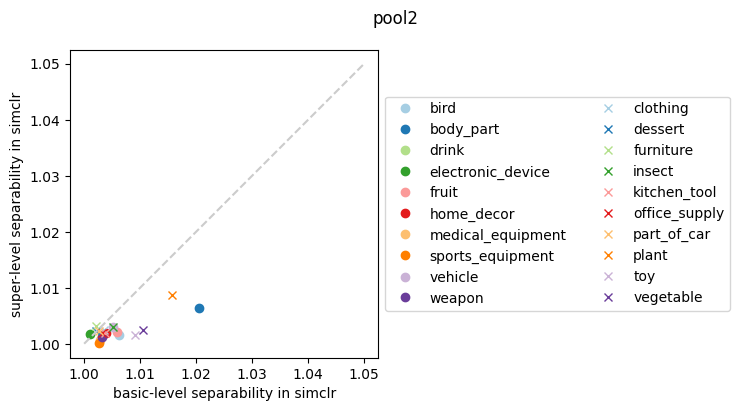

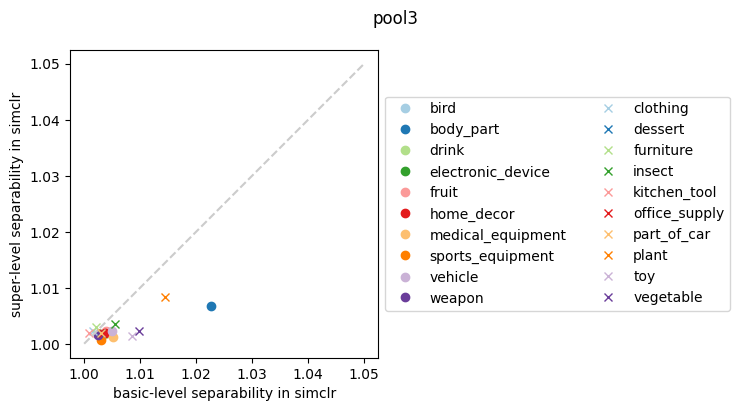

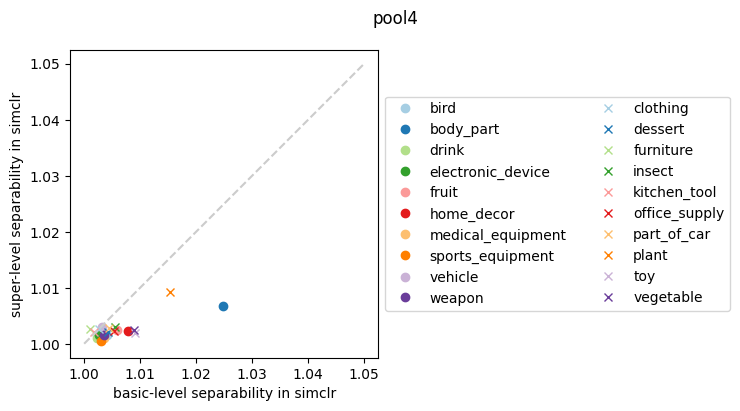

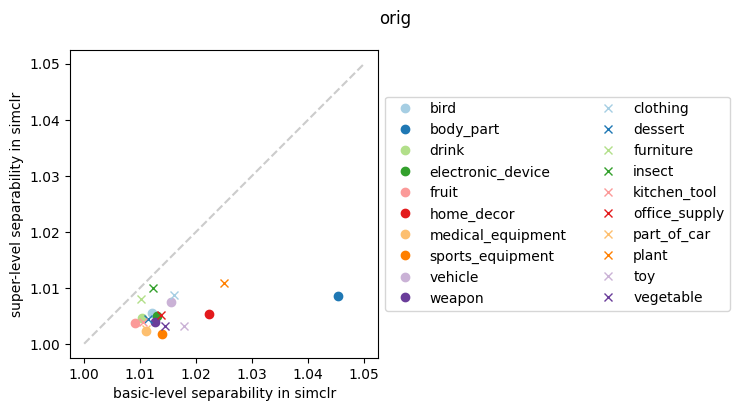

In [28]:
for ii in range(5):

    plt.figure(figsize=(12,4))

    lims = [1.0, 1.05]

    ax = plt.subplot(1,1,1)

    allh = []
    # pi=0
    for cbi in [0,1]:

        # pi+=1

        supnames = super_names[super_cbinds==cbi]

        dist1 = basic_sep_each_supcat[super_cbinds==cbi,ii]
        dist2 = super_sep_each_supcat[super_cbinds==cbi,ii]
        
        dist1 = dist1**(1/2)
        dist2 = dist2**(1/2)

        assert(np.all(dist1<lims[1]) & np.all(dist1>lims[0]))
        assert(np.all(dist2<lims[1]) & np.all(dist2>lims[0]))

        basic_colors = cm.Paired(np.linspace(0, 1, 12))[0:10,:]

        for bi in range(len(dist1)):

            h, = plt.plot(dist1[bi], dist2[bi], point_types[cbi], color=basic_colors[bi,:], alpha=1)

            allh+=[h]

    # plt.title('image set %d'%(cbi+1))

    plt.xlabel('basic-level separability in simclr')
    plt.ylabel('super-level separability in simclr')

    plt.xlim(lims)
    plt.ylim(lims)

    plt.plot(lims,lims, color=[0.8, 0.8, 0.8], linestyle='--')

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])

    plt.axis('square')
    # Put a legend to the right of the current axis
    ax.legend(allh, super_names, loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)


    plt.suptitle(image_type_names[ii])

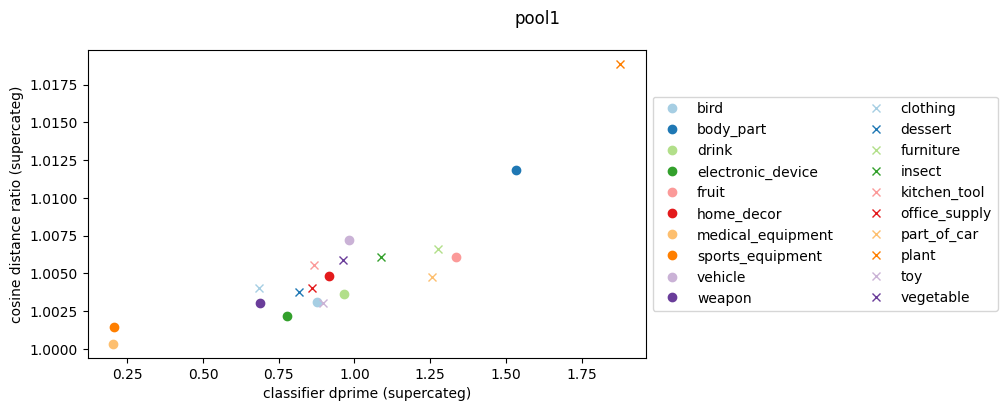

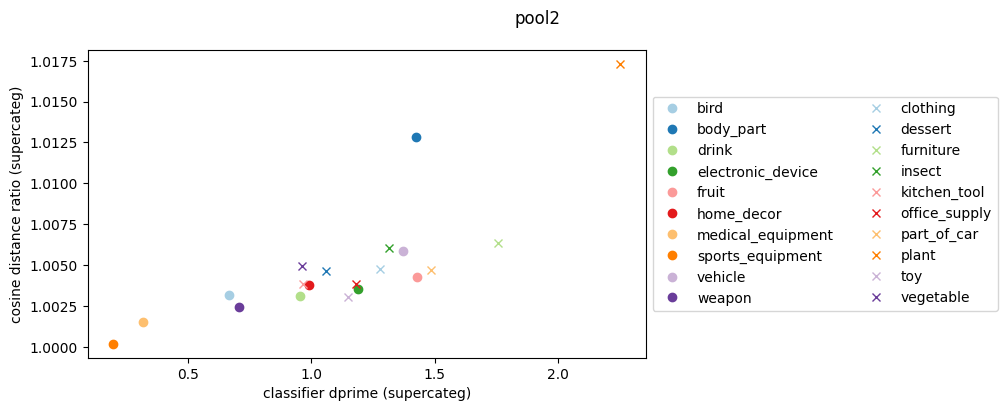

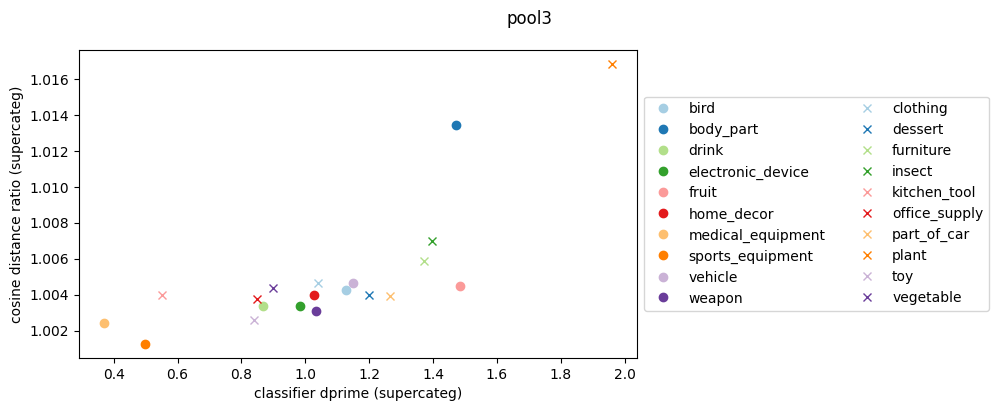

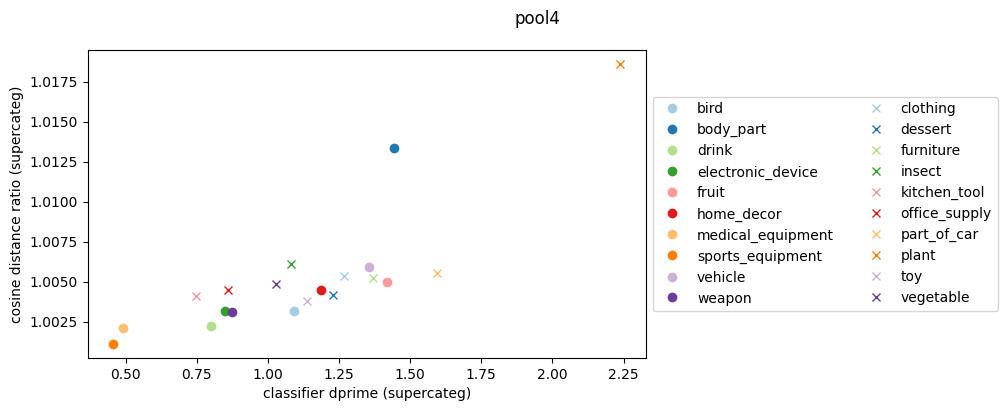

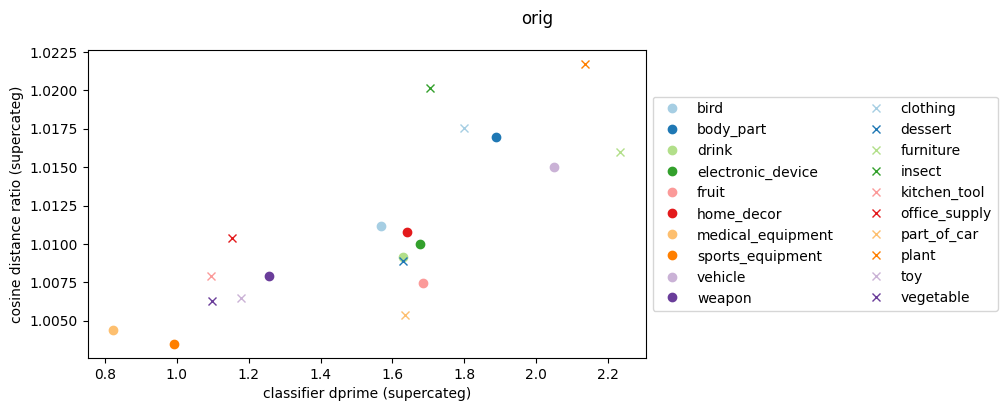

In [18]:
for ii in range(5):

    plt.figure(figsize=(12,4))

    # lims = [0.98, 1.12]

    ax = plt.subplot(1,1,1)

    allh = []
    # pi=0
    for cbi in [0,1]:

        # pi+=1

        supnames = super_names[super_cbinds==cbi]

        dist1 = d['dprime_each_supcat'][super_cbinds==cbi, ii]
        
        # dist1 = basic_sep_each_supcat[super_cbinds==cbi,ii]
        dist2 = super_sep_each_supcat[super_cbinds==cbi, ii]

        # assert(np.all(dist1<lims[1]) & np.all(dist1>lims[0]))
        # assert(np.all(dist2<lims[1]) & np.all(dist2>lims[0]))

        basic_colors = cm.Paired(np.linspace(0, 1, 12))[0:10,:]

        for bi in range(len(dist1)):

            h, = plt.plot(dist1[bi], dist2[bi], point_types[cbi], color=basic_colors[bi,:], alpha=1)

            allh+=[h]

    # plt.title('image set %d'%(cbi+1))

    plt.xlabel('classifier dprime (supercateg)')
    plt.ylabel('cosine distance ratio (supercateg)')

    # plt.xlim(lims)
    # plt.ylim(lims)

    # plt.plot(lims,lims, color=[0.8, 0.8, 0.8], linestyle='--')

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])

    # plt.axis('square')
    # Put a legend to the right of the current axis
    ax.legend(allh, super_names, loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)


    plt.suptitle(image_type_names[ii])

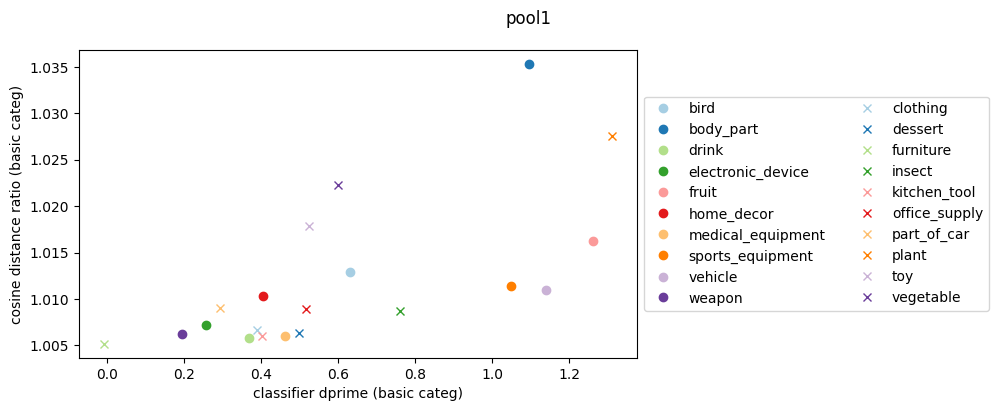

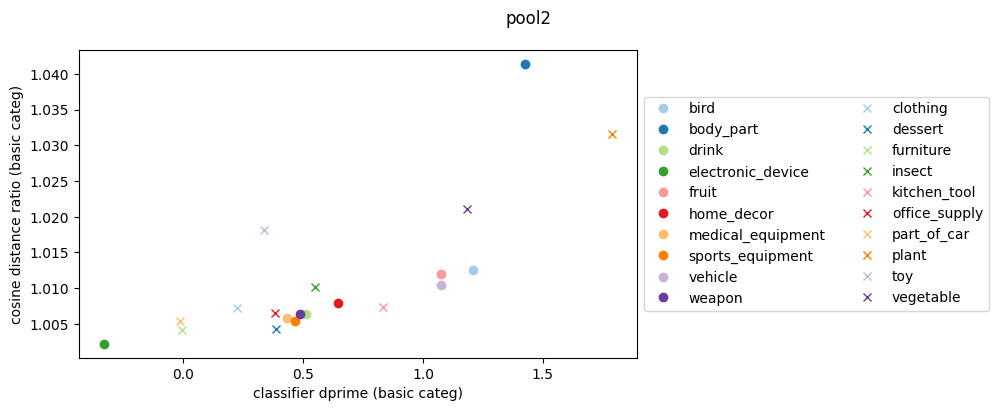

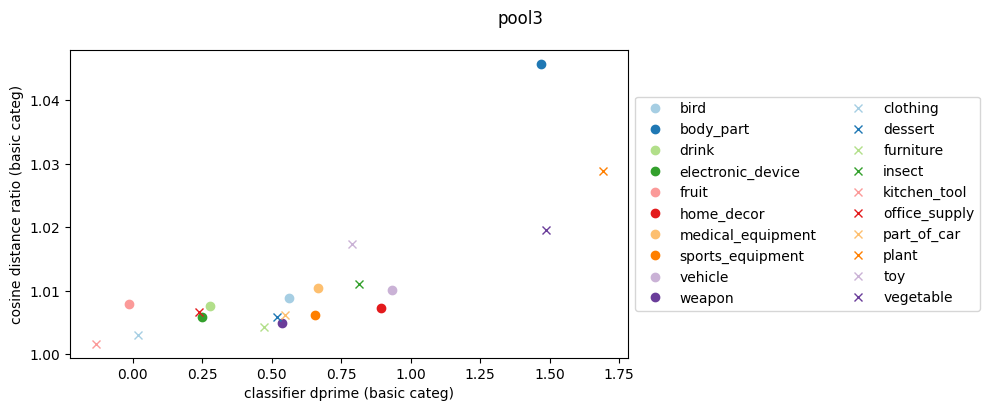

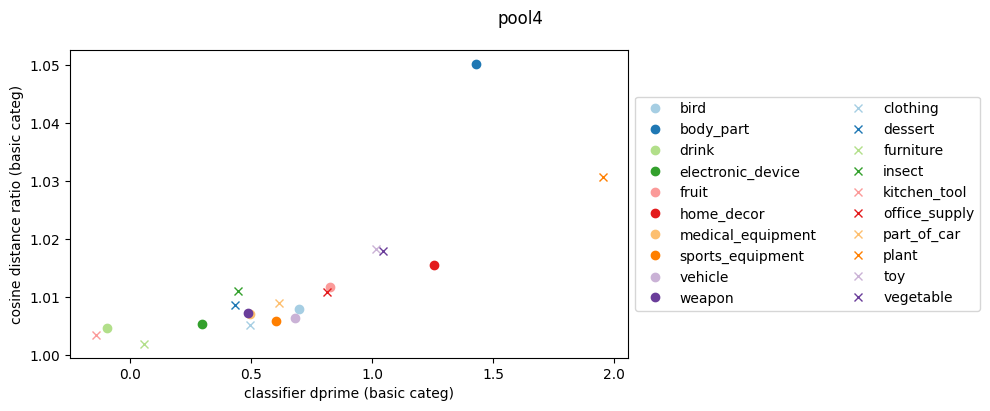

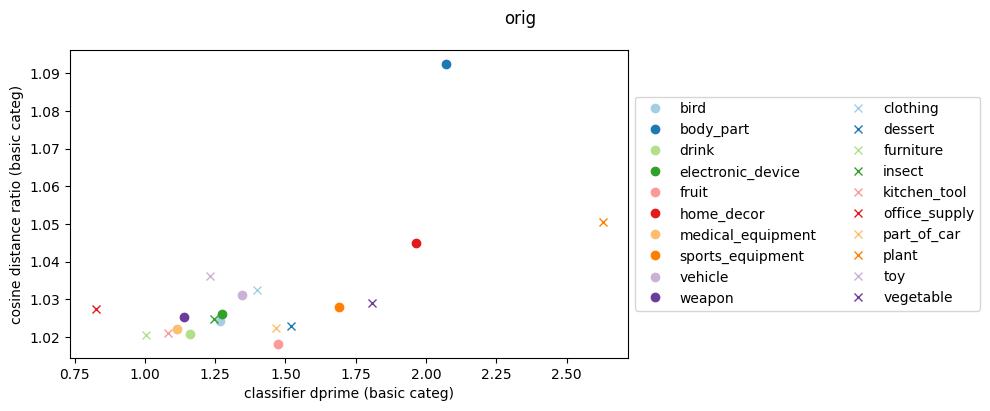

In [19]:
for ii in range(5):

    plt.figure(figsize=(12,4))

    # lims = [0.98, 1.12]

    ax = plt.subplot(1,1,1)

    allh = []
    # pi=0
    for cbi in [0,1]:

        # pi+=1

        supnames = super_names[super_cbinds==cbi]

        dist1 = d['dprime_basic_overall'][ii, super_cbinds==cbi]

        dist2 = basic_sep_each_supcat[super_cbinds==cbi,ii]
        
        # assert(np.all(dist1<lims[1]) & np.all(dist1>lims[0]))
        # assert(np.all(dist2<lims[1]) & np.all(dist2>lims[0]))

        basic_colors = cm.Paired(np.linspace(0, 1, 12))[0:10,:]

        for bi in range(len(dist1)):

            h, = plt.plot(dist1[bi], dist2[bi], point_types[cbi], color=basic_colors[bi,:], alpha=1)

            allh+=[h]

    # plt.title('image set %d'%(cbi+1))

    plt.xlabel('classifier dprime (basic categ)')
    plt.ylabel('cosine distance ratio (basic categ)')

    # plt.xlim(lims)
    # plt.ylim(lims)

    # plt.plot(lims,lims, color=[0.8, 0.8, 0.8], linestyle='--')

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])

    # plt.axis('square')
    # Put a legend to the right of the current axis
    ax.legend(allh, super_names, loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)


    plt.suptitle(image_type_names[ii])